#### Student Score Prediction using Linear Regression

“In this project, I built a simple linear regression model to predict students’ exam scores based on the number of hours they studied.
I started with exploratory data analysis, checking data shape, summary statistics, and visualizing the relationship between study hours and scores. 

The scatter plot showed a strong positive correlation, making linear regression a suitable choice.

I trained the model using scikit-learn’s LinearRegression, evaluated it using MAE, MSE, RMSE, and R². The R² score of 0.97 indicated that the model explained 97% of the variance in the target variable.

This project helped me understand the end-to-end process of regression modeling from data exploration to model evaluation and how to interpret error metrics.”

In [57]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv("student_scores.csv")

In [59]:
df.shape

(25, 2)

In [60]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


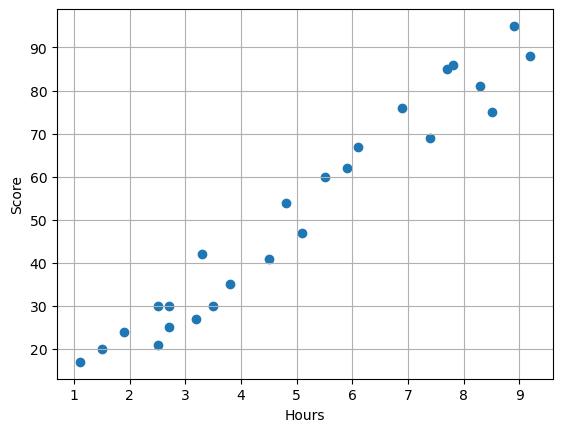

In [62]:
# Hours vs Scores plot
plt.scatter(df["Hours"], df["Scores"])
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

Hours     0.190338
Scores    0.233965
dtype: float64


<Axes: ylabel='Count'>

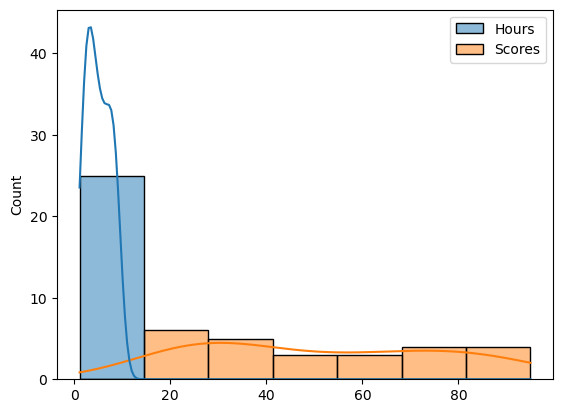

In [63]:
# Checking for Distribution
print(df.skew())
sns.histplot(df, kde = True)

In [64]:
X = df[["Hours"]]
y = df["Scores"]

In [65]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [68]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [69]:
print(f"Intercept (c) : {model.intercept_}")
print(f"Slope (m) : {model.coef_}")

Intercept (c) : 2.826892353899737
Slope (m) : [9.68207815]


The slope and intercept that our model has selected.

By keeping the formula of Linear Regression in mind : ( y = mx + c )

prediction = 9.68 Hours + 2.82*

### Model Evaluation

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae  = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2 : {r2:.2f}")

MAE : 3.92
MSE : 18.94
RMSE : 4.35
R2 : 0.97


RMSE is the square root of MSE, bringing the metric back to the original scale of the data.

It shows that the model’s predictions deviate from the actual values by about 4.35 units on average.

RMSE is more sensitive to outliers than MAE, since it’s derived from squared errors.

Model is fitting really well and covering about 97% variance of data
Model is off by 3.92 hours while predicting

To be extra sure we will be cross validating the scores using cross_val_scores in the next step.

### Cross validating the score

In [71]:
from sklearn.model_selection import cross_val_score

cv_mae_score = np.mean(cross_val_score(model,X_train,y_train, cv = 5 , scoring = "neg_mean_absolute_error"))
print(cv_mae_score)

-5.9025216991656775


In [72]:
from sklearn.model_selection import cross_val_score

cv_r2_score = np.mean(cross_val_score(model,X_train,y_train, cv = 5 , scoring = "r2"))
print(cv_r2_score)

0.7953635134250877


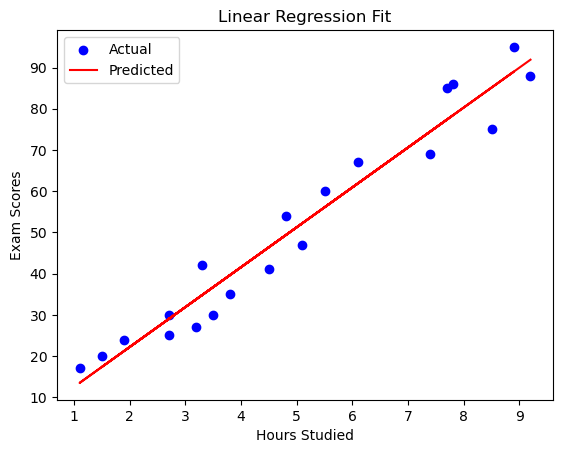

In [73]:
# Model Fit Plot
plt.scatter(X_train,y_train,color = "blue", label ="Actual")
plt.plot(X_train, model.predict(X_train) , color = "red", label = "Predicted")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Scores")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

we can observe that the model has fitted itself really well with no issues of over or under fitting.

In [74]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


### Saving model

In [56]:
import pickle

with open ("linear_model.pkl","wb") as file :
    pickle.dump(model,file)